In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#for timestamp
from datetime import datetime

#for division
from __future__ import division


In [2]:
#Read CSV file ( File From the Spark Cluster after applying filter for SPY )
df=pd.read_csv('/Users/daya/Desktop/TAQ-Output/trade/trade24.csv',parse_dates=True)
#Filter Trade data to include in trading time (9.30 to 4.00)
df=df[(df['Time'] >= '09:30:00:000000') & (df['Time'] <= '09:31:00:000000')]
df=df[(df['TradePrice']>=100)]
df

,Time,Ticker,Exchange,TradeVolume,TradePrice,SaleCondition,TradeCorrInd
0,09:30:00:183336,SPY,P,250,187.2800,@,0
1,09:30:00:188580,SPY,X,100,187.3200,@,0
2,09:30:00:189616,SPY,B,100,187.3200,@,0
3,09:30:00:189668,SPY,X,100,187.3200,@,0
4,09:30:00:191925,SPY,D,200,187.3800,@,0
5,09:30:00:211939,SPY,D,100,187.4800,@,0
6,09:30:00:222023,SPY,X,100,187.2500,@,0
7,09:30:00:226766,SPY,K,100,187.3300,@,0
8,09:30:00:247784,SPY,D,100,187.3200,@,0
9,09:30:00:261779,SPY,P,106,187.3500,@,0


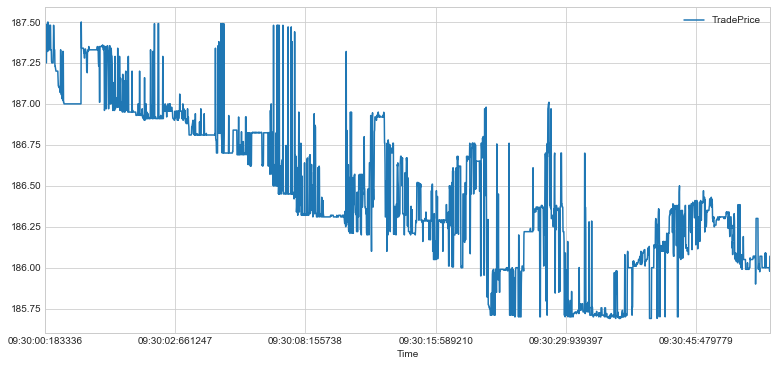

In [3]:

s=df.set_index(['Time'])
s['TradePrice'].plot(figsize=(13,6),legend='True')




In [4]:
#
group1=df['TradeVolume'].groupby(df['Exchange'])
type(group1)


pandas.core.groupby.SeriesGroupBy

In [30]:
 group1.sum()

Exchange
B      5448
D    254871
J     11398
K     57276
M      1300
P    303416
T    131573
X       300
Y       638
Z     33413
Name: TradeVolume, dtype: int64

In [24]:
#List the dominance of Exchages in the number of observations
group1.count()

Exchange
B     39
D    886
J     70
K    183
M      1
P    908
T    552
X      3
Y      6
Z    137
Name: TradeVolume, dtype: int64

In [28]:
group1.count().mean()

278.5

In [44]:
mydict=dict(group1.count())

In [40]:
#mean of Volume count

avg=group1.count().mean()
max=group1.count().max()
min=group1.count().min()
min

1

In [41]:
mynews=df.groupby('Exchange')

In [67]:
fh=open('/tmp/transaction.txt','a') 
for keys in mydict:
    if(mydict[keys]==max):
        keys='u'+keys
    elif(mydict[keys]==min):
        keys='d'+keys
    elif(mydict[keys]<avg):
        keys='a'+keys
    else:
        keys='b'+keys
    fh.write(keys)
    fh.write(" ")
    print(keys,end=" ")
fh.write("\n")
fh.close()

aB bD aJ aK dM uP bT aX aY aZ 

In [20]:
mynews.describe()

TradeCorrInd                                    TradePrice  \
                count mean  std  min  25%  50%  75%  max      count   
Exchange                                                              
B                39.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       39.0   
D               886.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      886.0   
J                70.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0       70.0   
K               183.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      183.0   
M                 1.0  0.0  NaN  0.0  0.0  0.0  0.0  0.0        1.0   
P               908.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      908.0   
T               552.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      552.0   
X                 3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        3.0   
Y                 6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0        6.0   
Z               137.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      137.0   

                       ...                       TradeVolume               \
                mean   ...           75%     max       count         mean   
Exchange               ...                                                  
B         186.296538   ...     186.42500  187.32        39.0   139.692308   
D         186.451092   ...     186.82350  187.49       886.0   287.664786   
J         186.415143   ...     186.67000  187.28        70.0   162.828571   
K         186.256557   ...     186.46000  187.35       183.0   312.983607   
M         186.280000   ...     186.28000  186.28         1.0  1300.000000   
P         186.550854   ...     186.92000  187.50       908.0   334.158590   
T         186.485190   ...     186.84000  187.35       552.0   238.356884   
X         187.296667   ...     187.32000  187.32         3.0   100.000000   
Y         186.777333   ...     187.16475  187.28         6.0   106.333333   
Z         186.285511   ...     186.56000  187.33       137.0   243.890511   

                                                                 
                  std     min     25%     50%      75%      max  
Exchange                                                         
B           97.946858   100.0   100.0   100.0   113.00    600.0  
D          434.546168   100.0   100.0   125.0   265.75   4900.0  
J          175.173535   100.0   100.0   100.0   100.00   1055.0  
K         1996.873194   100.0   100.0   100.0   190.00  26973.0  
M                 NaN  1300.0  1300.0  1300.0  1300.00   1300.0  
P          883.702214   100.0   100.0   141.0   250.00  17112.0  
T          644.409561   100.0   100.0   100.0   190.00   8650.0  
X            0.000000   100.0   100.0   100.0   100.00    100.0  
Y           15.513435   100.0   100.0   100.0   100.00    138.0  
Z          342.132191   100.0   100.0   100.0   200.00   2202.0  

[10 rows x 24 columns]

In [21]:
group1.describe()

,count,mean,std,min,25%,50%,75%,max
Exchange,,,,,,,,
B,39.0,139.692308,97.946858,100.0,100.0,100.0,113.00,600.0
D,886.0,287.664786,434.546168,100.0,100.0,125.0,265.75,4900.0
J,70.0,162.828571,175.173535,100.0,100.0,100.0,100.00,1055.0
K,183.0,312.983607,1996.873194,100.0,100.0,100.0,190.00,26973.0
M,1.0,1300.000000,NaN,1300.0,1300.0,1300.0,1300.00,1300.0
P,908.0,334.158590,883.702214,100.0,100.0,141.0,250.00,17112.0
T,552.0,238.356884,644.409561,100.0,100.0,100.0,190.00,8650.0
X,3.0,100.000000,0.000000,100.0,100.0,100.0,100.00,100.0
Y,6.0,106.333333,15.513435,100.0,100.0,100.0,100.00,138.0
